In [ ]:
import pandas as pd
import numpy as np
import random
random.seed(4)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import accuracy_score

In [ ]:
Housingad = pd.read_csv('Housingad.csv')
print(Housingad.isnull().sum())

Price            0
Area             0
Bedrooms         0
Bathrooms        0
parking          0
Home_Type        0
address egypt    0
dtype: int64


In [ ]:
 Housingad = Housingad.drop_duplicates()

In [ ]:
Housingad.info

<bound method DataFrame.info of        Price  Area  Bedrooms  Bathrooms  parking      Home_Type  \
0    3800000   280         4          3        2      Apartment   
1    3000000   160         3          3        3      Apartment   
2    2500000   165         3          2        2      Apartment   
3    3900000   260         3          2        3      Apartment   
4    3800000   160         3          3        2      Apartment   
..       ...   ...       ...        ...      ...            ...   
539   850000    85         2          1        0      Apartment   
540  4500000   100         3          1        0  Single family   
541  2000000   150         3          1        0      Apartment   
542  2900000   200         3          1        0      Apartment   
543  2800000   122         3          2        0      Apartment   

              address egypt  
0                 Nasr City  
1               Camp Caesar  
2                    Smouha  
3                 Nasr City  
4    New Cairo - El Tagamoa  
..                      ...  
539          Sharq District  
540  New Cairo - El Tagamoa  
541                 October  
542                 October  
543            Sheikh Zayed  

[542 rows x 7 columns]>

In [ ]:
for column in Housingad.columns:
  print(Housingad[column].value_counts())
  print("*"*20)

Price
5000000    23
3000000    18
2000000    16
2900000    15
4000000    14
           ..
1875000     1
975000      1
1940000     1
3650000     1
850000      1
Name: count, Length: 188, dtype: int64
********************
Area
120    26
170    23
200    18
190    18
160    18
       ..
178     1
141     1
199     1
297     1
207     1
Name: count, Length: 159, dtype: int64
********************
Bedrooms
3    294
2    110
4     90
5     27
1     15
6      6
Name: count, dtype: int64
********************
Bathrooms
2    243
3    172
1     97
4     26
5      4
Name: count, dtype: int64
********************
parking
0    247
1    154
2    127
3     14
Name: count, dtype: int64
********************
Home_Type
Apartment        315
Single family    194
villa             33
Name: count, dtype: int64
********************
address egypt
New Cairo - El Tagamoa    189
Sheikh Zayed               52
New Capital City           46
Madinaty                   40
October                    38
Nasr City         

In [ ]:
Housingad['address egypt'].value_counts()


address egypt
New Cairo - El Tagamoa    189
Sheikh Zayed               52
New Capital City           46
Madinaty                   40
October                    38
Nasr City                  18
Rehab City                 14
Mostakbal City             10
Haram                      10
Smouha                      9
Shorouk City                9
Hadayek al-Ahram            9
Nakheel                     6
Mohandessin                 5
Maadi                       5
Mokattam                    5
Alamein                     4
North Coast                 4
Heliopolis                  3
Miami                       3
Mansura                     3
Katameya                    3
Helmeyat El Zaytoun         3
Sidi Beshr                  3
Gesr Al Suez                3
New Heliopolis              3
Zahraa Al Maadi             3
Borg al-Arab                2
Al Ibrahimiyyah             2
Sharq District              2
Seyouf                      2
Bolkly                      2
Fleming                   

In [ ]:
Housingad['Area'].value_counts()


Area
120    26
170    23
200    18
190    18
160    18
       ..
178     1
141     1
199     1
297     1
207     1
Name: count, Length: 159, dtype: int64

In [ ]:
Housingad['Price'].value_counts()


Price
5000000    23
3000000    18
2000000    16
2900000    15
4000000    14
           ..
1875000     1
975000      1
1940000     1
3650000     1
850000      1
Name: count, Length: 188, dtype: int64

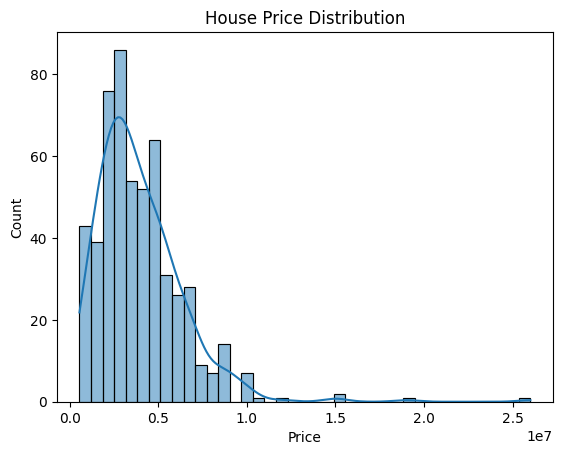

In [ ]:
plt.figure
sns.histplot(Housingad ['Price'], kde=True)
plt.title('House Price Distribution')
plt.xlabel('Price')
plt.show()

<ipython-input-37-ef1ee40ef2cd>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = "address egypt", y = "Price", palette = "Set2", height=10.27, aspect=11.7/10.27, data = Housingad)


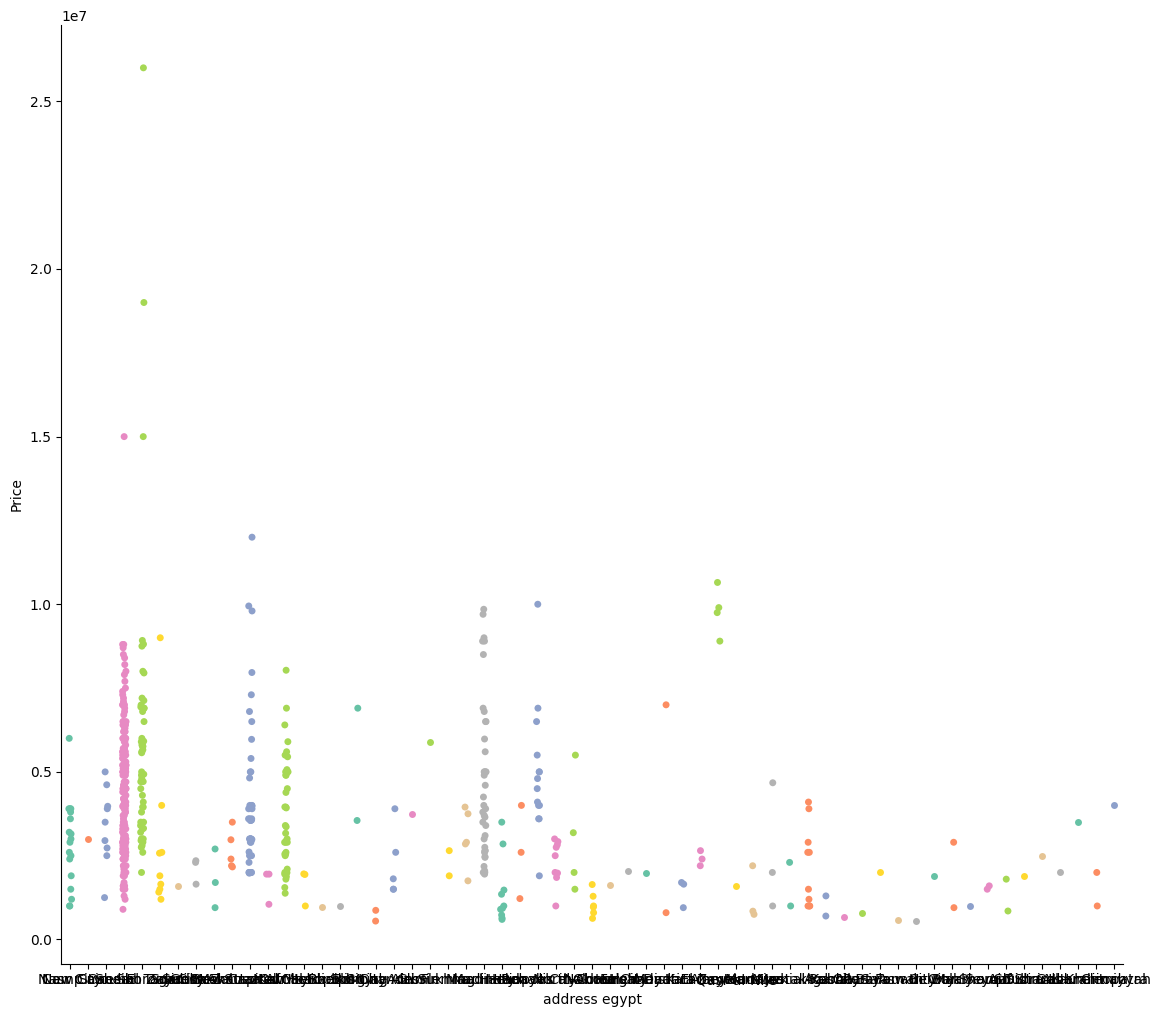

In [ ]:
sns.catplot(x = "address egypt", y = "Price", palette = "Set2", height=10.27, aspect=11.7/10.27, data = Housingad)


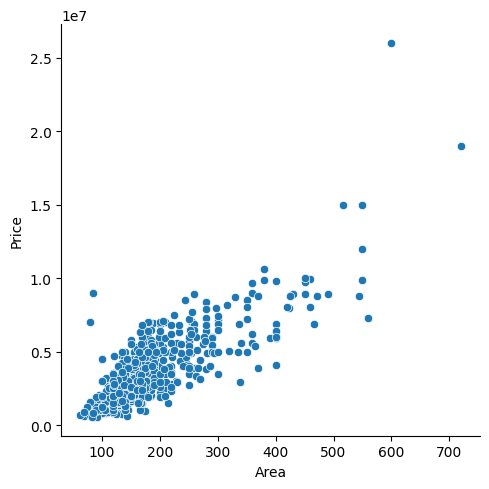

In [ ]:
sns.relplot(x='Area', y = 'Price' , data = Housingad)


count    5.420000e+02
mean     3.958466e+06
std      2.480546e+06
min      5.500000e+05
25%      2.312500e+06
50%      3.500000e+06
75%      5.000000e+06
max      2.600000e+07
Name: Price, dtype: float64


<ipython-input-39-28b5bb802603>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Housingad['Price'], color='g', bins=100, hist_kws={'alpha': 0.4});


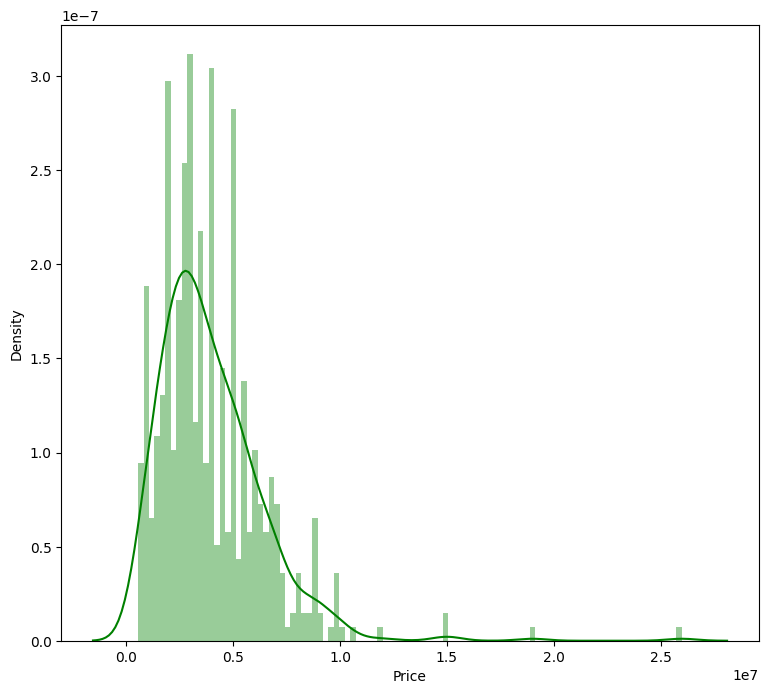

In [ ]:
print(Housingad['Price'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(Housingad['Price'], color='g', bins=100, hist_kws={'alpha': 0.4});

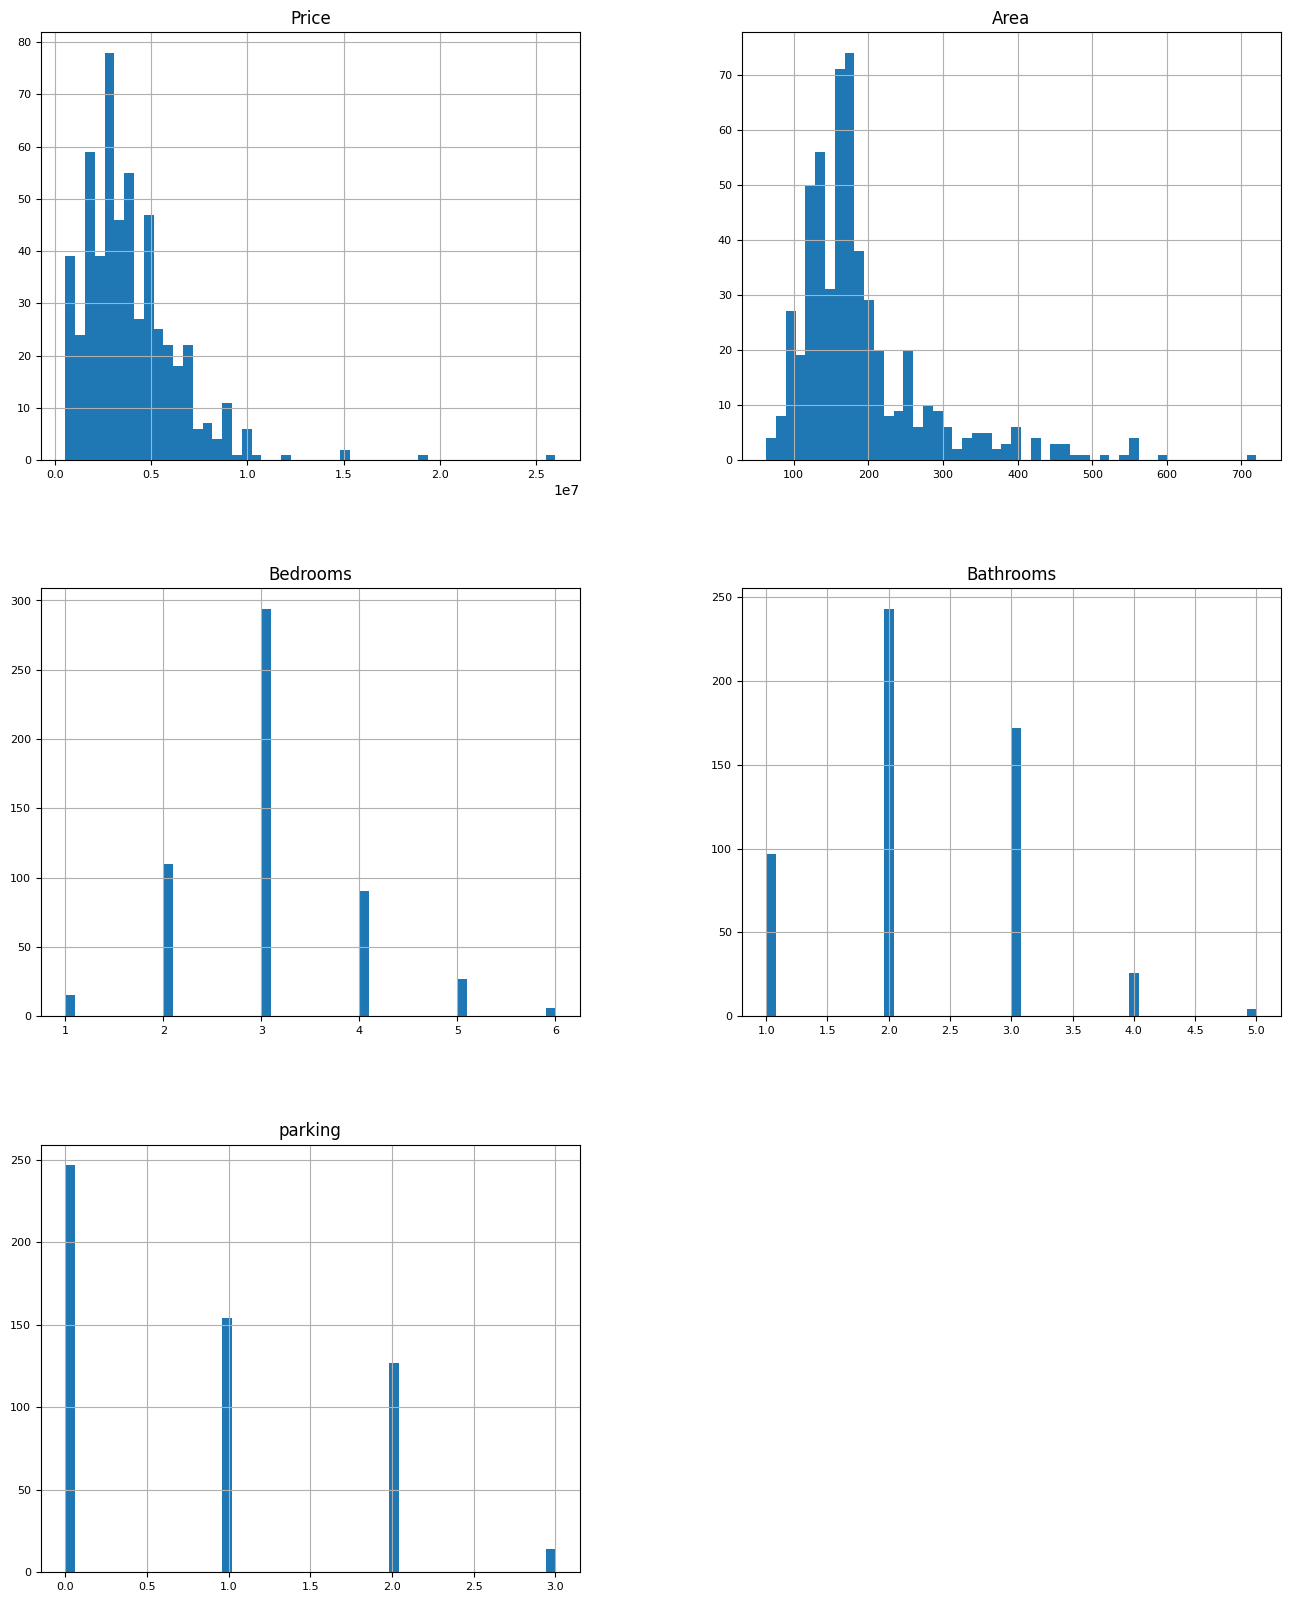

In [ ]:
Housingad.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);


<ipython-input-41-453dc4adefd0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Housingad["Price"])


<Axes: xlabel='Price', ylabel='Density'>

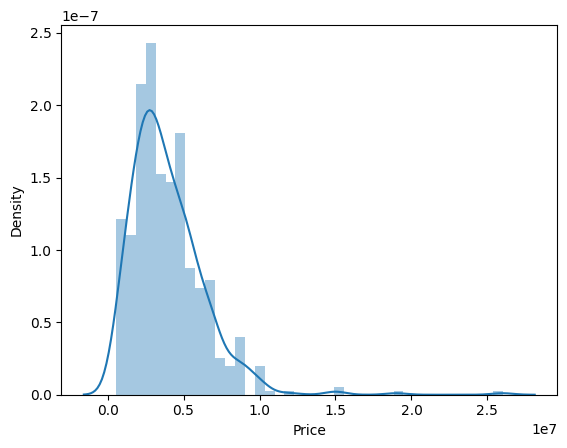

In [ ]:
sns.distplot(Housingad["Price"])


In [ ]:
Housingad = pd.read_csv('Housingad.csv')
print(Housingad.head(8))

     Price  Area  Bedrooms  Bathrooms  parking      Home_Type  \
0  3800000   280         4          3        2      Apartment   
1  3000000   160         3          3        3      Apartment   
2  2500000   165         3          2        2      Apartment   
3  3900000   260         3          2        3      Apartment   
4  3800000   160         3          3        2      Apartment   
5  4600000   222         4          3        2      Apartment   
6  5200000   290         5          5        2      Apartment   
7  5600000   220         4          2        2  Single family   

            address egypt  
0               Nasr City  
1             Camp Caesar  
2                  Smouha  
3               Nasr City  
4  New Cairo - El Tagamoa  
5  New Cairo - El Tagamoa  
6  New Cairo - El Tagamoa  
7            Sheikh Zayed  


In [ ]:
Housingad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Price          544 non-null    int64 
 1   Area           544 non-null    int64 
 2   Bedrooms       544 non-null    int64 
 3   Bathrooms      544 non-null    int64 
 4   parking        544 non-null    int64 
 5   Home_Type      544 non-null    object
 6   address egypt  544 non-null    object
dtypes: int64(5), object(2)
memory usage: 29.9+ KB


In [ ]:
Housingad.Home_Type.unique()


def Type(x):
    if x =="Apartment":
            return 1
    if x =="Single family":
            return 2
    if x =="villa":
            return 3

In [ ]:
Housingad['Home_Type']=Housingad.Home_Type.map(Type)
Housingad.head(10)

,Price,Area,Bedrooms,Bathrooms,parking,Home_Type,address egypt
0,3800000,280,4,3,2,1,Nasr City
1,3000000,160,3,3,3,1,Camp Caesar
2,2500000,165,3,2,2,1,Smouha
3,3900000,260,3,2,3,1,Nasr City
4,3800000,160,3,3,2,1,New Cairo - El Tagamoa
5,4600000,222,4,3,2,1,New Cairo - El Tagamoa
6,5200000,290,5,5,2,1,New Cairo - El Tagamoa
7,5600000,220,4,2,2,2,Sheikh Zayed
8,4000000,200,3,3,2,2,New Cairo - El Tagamoa
9,1500000,146,3,2,1,2,New Cairo - El Tagamoa


In [ ]:
Housingad.describe()

,Price,Area,Bedrooms,Bathrooms,parking,Home_Type
count,5.440000e+02,544.000000,544.000000,544.000000,544.000000,544.000000
mean,3.957516e+06,190.347426,3.038603,2.257353,0.827206,1.477941
std,2.476053e+06,88.997893,0.881767,0.829887,0.875024,0.609524
min,5.500000e+05,63.000000,1.000000,1.000000,0.000000,1.000000
25%,2.337500e+06,135.000000,3.000000,2.000000,0.000000,1.000000
50%,3.500000e+06,170.000000,3.000000,2.000000,1.000000,1.000000
75%,5.000000e+06,205.500000,3.000000,3.000000,2.000000,2.000000
max,2.600000e+07,720.000000,6.000000,5.000000,3.000000,3.000000


In [ ]:
X = Housingad.drop(['Price','address egypt'], axis=1)
y = Housingad['Price']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=71)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=62)


In [ ]:
X_train.head(), y_train.head()

(     Area  Bedrooms  Bathrooms  parking  Home_Type
 210   170         3          2        2          1
 451   266         3          3        1          2
 359   180         3          3        0          1
 234   200         3          2        0          1
 424   200         3          3        0          1,
 210    3170000
 451    3900000
 359    7000000
 234    2850000
 424    3500000
 Name: Price, dtype: int64)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
accuracy = regressor.score(X_test, y_test)
print("accuracy:", accuracy)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R^2 score:", r2)




accuracy: 0.731834195115443
Mean Squared Error: 1917291717663.853
R^2 score: 0.731834195115443


In [ ]:
train_predictions = model.predict(X_train)

# Print the predictions
print(train_predictions)

[ 3448756.93047777  5733247.77186067  4108296.52896805  4037191.40784157
  4467624.47365478 10402035.49809959  4931514.77924802  2695348.46322431
  1711193.10564618  2580795.19688578  2767214.05216166  2500954.11614612
  1228218.36784409  3494203.00050108  4061015.30935321 11031897.76584324
  4692314.76724364  3337262.38351331  5954419.20501653  5464869.84832012
  3724247.30411446  5470506.69627813 12971508.19934074  2680618.08848949
  2779543.60143799  3497302.11215626  5464869.84832012  2070521.05033291
  4141753.76874807  2885043.73328081  7138145.61657193  3900675.25395831
  3674627.44065532  5808212.47245319  4238517.94097771  4826952.41834152
  3485109.47372426  3699526.02394761  3264636.32676509  3956452.9484467
  3938265.89489307  5445785.41611128  5950422.71470614  5598610.12076279
  3822815.24989932  9153078.3178256   6835815.97524338  3117669.12639088
  4170171.21247336  5661739.75008696  7415554.88527511  1905587.45272436
  4680745.68577818  2745728.79449433  6739723.584147

In [ ]:
new_data = pd.DataFrame({'Area': [90], 'Bedrooms': [1],'Bathrooms': [1],'parking': [0],'Home_Type': [1]})
prediction = model.predict(new_data)
print("Predicted price:", prediction)

Predicted price: [1432603.62035431]


In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1987738111013.4749


In [ ]:
#X = Book.drop(['price'],axis=1)
#X = Book.drop(['address egypt'],axis=1)
X = zHousing.drop(['Price'], axis=1)
#X = Housing.drop(['Price', 'address egypt','Home Type'], axis=1)
y = zHousing['Price']
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
X_train.dropna(inplace=True)
y_train = y_train[X_train.index]

In [ ]:
from sklearn.impute import SimpleImputer

# Impute NaN values with the mean of the column
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)

In [ ]:
from sklearn.impute import SimpleImputer

# Create an imputer object with mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data
imputer.fit(X_train)

# Transform both training and testing data
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train the model
model.fit(X_train_imputed, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_imputed)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


In [ ]:
model = LinearRegression()

# Fit the imputer on the training data and transform both X_train and X_test
X_train_imputed = imputer.fit_transform(X_train)
x_test_imputed = imputer.transform(X_test)

# Now, train your model on the imputed training data
model.fit(X_train_imputed, y_train)
X_train_imputed

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test_imputed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 score:", r2)


accuracy = model.score(X_test_imputed, y_test)
print("accuracy:", accuracy)

Mean Squared Error: 2890414924545.9575
R^2 score: 0.12087966035174857
accuracy: 0.12087966035174857


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(
